
----

### Analysis
* During the end of the calendar year the temperature tends to be cooler in the northern hemisphere, where latitudes are greater than 0 and temperature is warmer in the southern hemisphere where latitudes are less than 1.
* There is no strong relationship between latitude and humidity, cloudliness, and wind speed. However, the data suggests that there are more cities with a relative humidity greater than 50% and wind speed less than 15 mph, which would be an interesting analysis.
* The data shows that the higher the latitude the lower the max temperature due to the city being further away from the equator. 


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from random import uniform
from datetime import datetime

# Importing API key
from api_keys import api_key

# Incorporating citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

    
# Creating columns and df to lat & lng
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)


## Cities List

In [2]:
# Randomly generating a list of cities
for x in range(1750):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Removing duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

### Performing API Calls


In [3]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")
    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1  

Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Barrow AR
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=barrow


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_l

------------------------
Proceesing: City #  2  |  Kapaa US
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=kapaa
------------------------
Proceesing: City #  3  |  Krosno Odrzanskie PL
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=krosno+odrzanskie
------------------------
Proceesing: City #  4  |  Hithadhoo MV
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=hithadhoo
------------------------
Proceesing: City #  5  |  Lira UG
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=lira
------------------------
Proceesing: City #  6  |  Faanui PF
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=faanui
------------------------
Proceesing: City #  7  |  Hobart AU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb

------------------------
Proceesing: City #  49  |  Taganak PH
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=taganak
------------------------
Proceesing: City #  50  |  Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=tasiilaq
------------------------
Proceesing: City #  51  |  Puerto Ayora EC
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=puerto+ayora
------------------------
Proceesing: City #  52  |  Pevek RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=pevek
City not found, skipping...
------------------------
Proceesing: City #  53  |  Taoudenni ML
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=taoudenni
------------------------
Proceesing: City #  54  |  Clyde River CA
http://api.openweatherm

------------------------
Proceesing: City #  96  |  Avarua CK
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=avarua
------------------------
Proceesing: City #  97  |  Luderitz NA
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=luderitz
------------------------
Proceesing: City #  98  |  Mercedes UY
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=mercedes
City not found, skipping...
------------------------
Proceesing: City #  99  |  Yeppoon AU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=yeppoon
------------------------
Proceesing: City #  100  |  Vasudevanallur IN
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=vasudevanallur
------------------------
Proceesing: City #  101  |  Guerrero Negro MX
http://api.ope

------------------------
Proceesing: City #  143  |  Kholm-Zhirkovskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=kholm-zhirkovskiy
City not found, skipping...
------------------------
Proceesing: City #  144  |  Vao EE
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=vao
------------------------
Proceesing: City #  145  |  Bubaque GW
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=bubaque
------------------------
Proceesing: City #  146  |  Hamilton CA
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=hamilton
------------------------
Proceesing: City #  147  |  Cabo San Lucas MX
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=cabo+san+lucas
City not found, skipping...
------------------------
Proceesing: City

------------------------
Proceesing: City #  189  |  Beringovskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=beringovskiy
------------------------
Proceesing: City #  190  |  Ostrovnoy RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=ostrovnoy
------------------------
Proceesing: City #  191  |  Baruun-Urt MN
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=baruun-urt
------------------------
Proceesing: City #  192  |  Saskylakh RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=saskylakh
------------------------
Proceesing: City #  193  |  Mehamn NO
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=mehamn
------------------------
Proceesing: City #  194  |  Batagay RU
http://api.openweathermap.org/data/2.5/

City not found, skipping...
------------------------
Proceesing: City #  235  |  Dingle PH
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=dingle
------------------------
Proceesing: City #  236  |  Ulaangom MN
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=ulaangom
------------------------
Proceesing: City #  237  |  Luanda AO
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=luanda
------------------------
Proceesing: City #  238  |  Mogadishu SO
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=mogadishu
City not found, skipping...
------------------------
Proceesing: City #  239  |  Xining CN
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=xining
------------------------
Proceesing: City #  240  |  Yanliang CN
http

------------------------
Proceesing: City #  281  |  Chicama PE
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=chicama
------------------------
Proceesing: City #  282  |  Jeremie HT
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=jeremie
------------------------
Proceesing: City #  283  |  Gull Lake CA
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=gull+lake
------------------------
Proceesing: City #  284  |  Arlit NE
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=arlit
------------------------
Proceesing: City #  285  |  Iranshahr IR
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=iranshahr
------------------------
Proceesing: City #  286  |  Belmonte PT
http://api.openweathermap.org/data/2.5/weather?appid=e93

------------------------
Proceesing: City #  327  |  Mari BR
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=mari
------------------------
Proceesing: City #  328  |  Virginia Beach US
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=virginia+beach
------------------------
Proceesing: City #  329  |  Pinega RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=pinega
------------------------
Proceesing: City #  330  |  Petatlan MX
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=petatlan
------------------------
Proceesing: City #  331  |  Cherskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=cherskiy
------------------------
Proceesing: City #  332  |  Kaitangata NZ
http://api.openweathermap.org/data/2.5/weather?a

------------------------
Proceesing: City #  373  |  Severo-Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=severo-kurilsk
------------------------
Proceesing: City #  374  |  Lagos NG
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=lagos
------------------------
Proceesing: City #  375  |  Bedele ET
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=bedele
------------------------
Proceesing: City #  376  |  El Carmen AR
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=el+carmen
------------------------
Proceesing: City #  377  |  Tiarei PF
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=tiarei
------------------------
Proceesing: City #  378  |  Puerto Escondido MX
http://api.openweathermap.org/data/2.5/wea

------------------------
Proceesing: City #  419  |  Tsumeb NA
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=tsumeb
City not found, skipping...
------------------------
Proceesing: City #  420  |  Thinadhoo MV
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=thinadhoo
------------------------
Proceesing: City #  421  |  Mountain Home US
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=mountain+home
City not found, skipping...
------------------------
Proceesing: City #  422  |  Ancud CL
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=ancud
------------------------
Proceesing: City #  423  |  San Quintin PH
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=san+quintin
------------------------
Proceesing: City #  424  |

------------------------
Proceesing: City #  466  |  Banikoara BJ
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=banikoara
------------------------
Proceesing: City #  467  |  Novoagansk RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=novoagansk
------------------------
Proceesing: City #  468  |  Hegang CN
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=hegang
------------------------
Proceesing: City #  469  |  Koppies ZA
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=koppies
------------------------
Proceesing: City #  470  |  Abha SA
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=abha
------------------------
Proceesing: City #  471  |  Chinsali ZM
http://api.openweathermap.org/data/2.5/weather?appid=e932d

------------------------
Proceesing: City #  513  |  Alice Springs AU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=alice+springs
------------------------
Proceesing: City #  514  |  Chapais CA
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=chapais
------------------------
Proceesing: City #  515  |  Pandan PH
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=pandan
------------------------
Proceesing: City #  516  |  Kosh-Agach RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=kosh-agach
------------------------
Proceesing: City #  517  |  Susuman RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=susuman
------------------------
Proceesing: City #  518  |  Havelock US
http://api.openweathermap.org/data/2.5/weath

------------------------
Proceesing: City #  559  |  Parrita CR
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=parrita
------------------------
Proceesing: City #  560  |  Nyurba RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=nyurba
------------------------
Proceesing: City #  561  |  Nantucket US
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=nantucket
------------------------
Proceesing: City #  562  |  Konevo BG
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=konevo
------------------------
Proceesing: City #  563  |  Meadow Lake CA
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=meadow+lake
------------------------
Proceesing: City #  564  |  Puri ID
http://api.openweathermap.org/data/2.5/weather?appid=e93

------------------------
Proceesing: City #  605  |  Ylojarvi FI
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=ylojarvi
------------------------
Proceesing: City #  606  |  Balkhash KZ
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=balkhash
------------------------
Proceesing: City #  607  |  Kyshtovka RU
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=kyshtovka
------------------------
Proceesing: City #  608  |  Marshall US
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=marshall
------------------------
Proceesing: City #  609  |  Rafai CF
http://api.openweathermap.org/data/2.5/weather?appid=e932d93bb24faf8788e7b9ced56727ce&units=IMPERIAL&q=rafai
------------------------
Proceesing: City #  610  |  Worland US
http://api.openweathermap.org/data/2.5/weather?appid=e9

In [4]:
#Getting count of DataFrame to make sure everything adds up 
clean_cities_df.count()

City                641
Country             641
Temperature (F)     641
Latitude            641
Longitude           641
Humidity (%)        641
Cloudiness (%)      641
Wind Speed (mph)    641
dtype: int64

### Convert Raw Data to DataFrame

In [5]:
#Resetting the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Barrow,AR,64.22,-38.31,-60.23,88,44,4.61
1,Kapaa,US,64.83,22.08,-159.32,60,1,11.41
2,Krosno Odrzanskie,PL,46.98,52.05,15.1,66,40,11.41
3,Hithadhoo,MV,84.47,-0.6,73.08,100,0,2.82
4,Lira,UG,93.29,2.25,32.9,21,12,13.67
5,Faanui,PF,82.67,-16.48,-151.75,100,68,6.29
6,Hobart,AU,61.9,-42.88,147.33,93,75,2.37
7,Khatanga,RU,12.02,71.98,102.47,80,80,12.77
8,Meulaboh,ID,80.87,4.14,96.13,100,44,2.37
9,Burnie,AU,64.35,-41.05,145.91,96,56,1.99


In [6]:
# Save data to a CSV file
clean_cities_df.to_csv("Cities_csv")

### Plotting the Data

#### Latitude vs. Temperature 

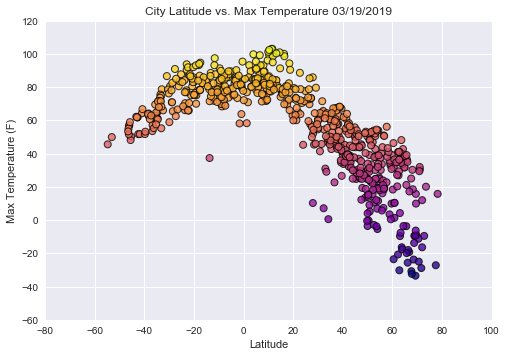

In [9]:

#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

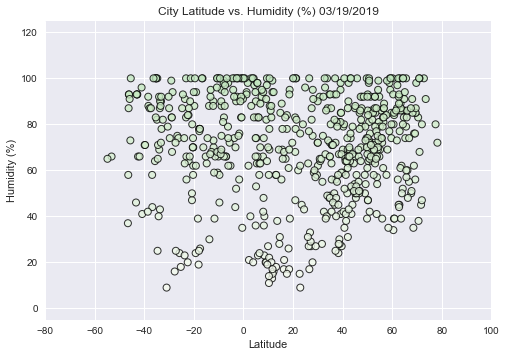

In [10]:

#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

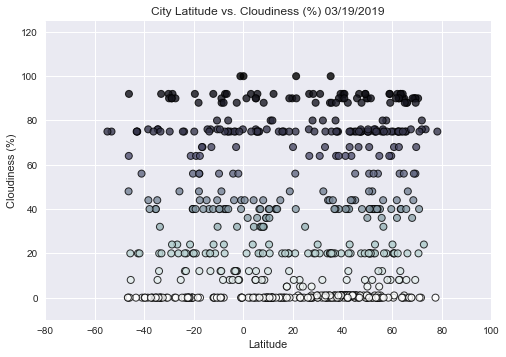

In [12]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

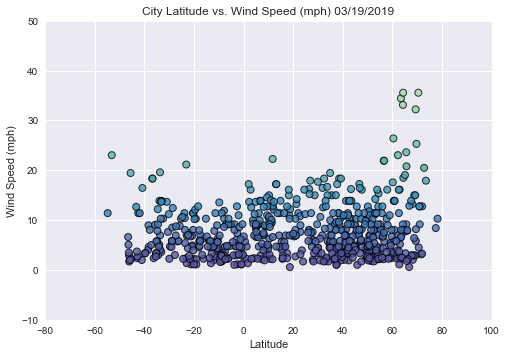

In [14]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()